In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader

In [5]:
data=pd.read_csv("synthetic_regression_dataset.csv")

In [6]:
print(data.head())
print(data.columns)

    Feature     Target
0 -1.758739 -32.770386
1  1.031845   3.504591
2 -0.487606 -17.930308
3  0.186454  -3.990201
4  0.725767  13.105264
Index(['Feature', 'Target'], dtype='object')


In [7]:
data.shape

(1000, 2)

## Step 2: Dataset preparation

In [8]:
X = data.iloc[:, 0].values.reshape(-1, 1)  # Features (1D array to 2D array)
y = data.iloc[:, 1].values.reshape(-1, 1)  # Target (1D array to 2D array)

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
import torch

# Convert numpy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


## Step 3: Build the regressor

In [12]:
import torch.nn as nn

class FeedforwardNN(nn.Module):
    def __init__(self):
        super(FeedforwardNN,self).__init__()
        self.hidden1= nn.Linear(1,20)
        self.hidden2=nn.Linear(20,10)
        self.output=nn.Linear(10,1)
        self.relu=nn.ReLU()

    def forward(self,x):
        x=self.relu(self.hidden1(x))
        x=self.relu(self.hidden2(x))
        x=self.output(x)
        return x

model=FeedforwardNN()
print(model)

FeedforwardNN(
  (hidden1): Linear(in_features=1, out_features=20, bias=True)
  (hidden2): Linear(in_features=20, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


## Step 4: Define Loss & Optimizer (e.g., MSELoss, Adam)

In [13]:
loss_fn=nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)


## Step 5: Train the model for 100-500 epochs

Epoch 20/500, Loss: 354.4996
Epoch 40/500, Loss: 351.4585
Epoch 60/500, Loss: 347.4277
Epoch 80/500, Loss: 341.5188
Epoch 100/500, Loss: 333.1099
Epoch 120/500, Loss: 321.8090
Epoch 140/500, Loss: 307.3471
Epoch 160/500, Loss: 289.7112
Epoch 180/500, Loss: 269.1844
Epoch 200/500, Loss: 246.3161
Epoch 220/500, Loss: 222.5604
Epoch 240/500, Loss: 199.7946
Epoch 260/500, Loss: 179.6337
Epoch 280/500, Loss: 162.8896
Epoch 300/500, Loss: 149.4578
Epoch 320/500, Loss: 138.7348
Epoch 340/500, Loss: 130.0600
Epoch 360/500, Loss: 122.9772
Epoch 380/500, Loss: 117.2686
Epoch 400/500, Loss: 112.7320
Epoch 420/500, Loss: 109.1974
Epoch 440/500, Loss: 106.4737
Epoch 460/500, Loss: 104.3466
Epoch 480/500, Loss: 102.7398
Epoch 500/500, Loss: 101.3258


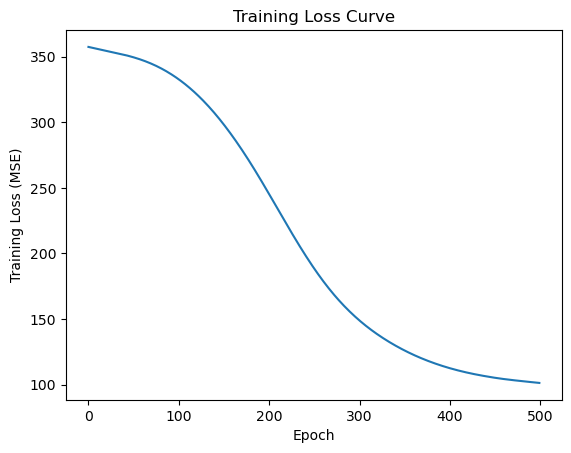

In [ ]:
epochs = 500  

train_losses = []  

for epoch in range(epochs):
    model.train() 
    
    optimizer.zero_grad()  
    
    y_pred = model(X_train) 
    
    loss = loss_fn(y_pred, y_train)  
    
    loss.backward() 
    
    optimizer.step()  

    
    train_losses.append(loss.item())  # Save loss value
    

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# After training, plot the loss curve
import matplotlib.pyplot as plt

plt.plot(range(epochs), train_losses)
plt.xlabel("Epoch")
plt.ylabel("Training Loss (MSE)")
plt.title("Training Loss Curve")
plt.show()


## Step 6: 

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model.eval()  

with torch.no_grad():  
    y_test_pred = model(X_test)  

# Convert tensors to numpy arrays for sklearn functions
y_test_true = y_test.numpy()
y_test_pred = y_test_pred.numpy()

#regression metrics
mse = mean_squared_error(y_test_true, y_test_pred)
mae = mean_absolute_error(y_test_true, y_test_pred)
r2 = r2_score(y_test_true, y_test_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R² Score: {r2:.4f}")


Test MSE: 114.3906
Test MAE: 8.3706
Test R² Score: 0.7019


# Step 7: Plot Predictions vs Actual

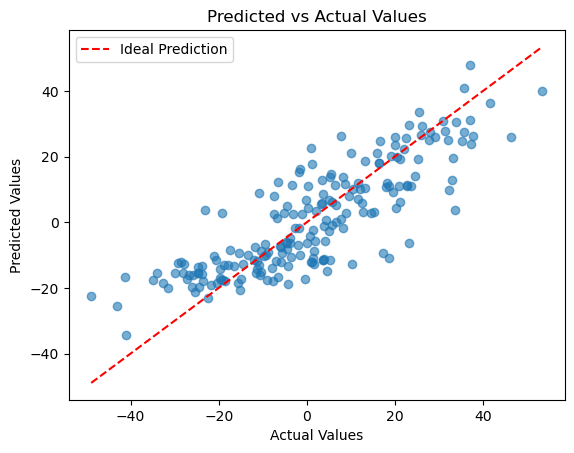

In [16]:
import matplotlib.pyplot as plt

plt.scatter(y_test_true, y_test_pred, alpha=0.6)
plt.plot([y_test_true.min(), y_test_true.max()], 
         [y_test_true.min(), y_test_true.max()], 
         color='red', linestyle='--', label='Ideal Prediction')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.legend()
plt.show()


In [17]:
torch.save(model.state_dict(), 'final_model.pth')